# Business Understanding: Which questions to ask the data?
Stack overflow survey has data collected from students/professionals/freelancers and other categories across the world. This is a data mine and could be used to gather key business insights.

Let us try to answer below questions which may be of some use to hiring/recruitment firms, online education companies, HR professionals.



1) How does the salary vary among people based on the factor if they are looking out?

2) Is there a difference in job satisfaction across the countries?

3) What are the most important factors for employed people which come into consideration while applying for jobs?

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [199]:
df = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv')

In [200]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [202]:
df.shape

(51392, 154)

In [203]:
schema.shape

(154, 2)

In [204]:
display(schema)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [207]:
with pd.option_context( 'display.max_rows', 200, 'display.max_colwidth', -1):
    display(schema)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


# Data Understanding

As we can see from the questions above, our primary data of interest are people who are employed.So we will focus on that section of  data only.

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64


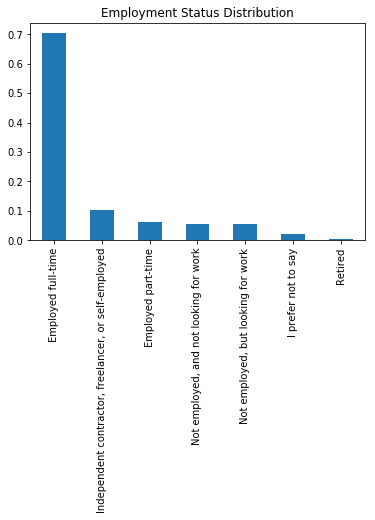

In [208]:
status_vals = df.EmploymentStatus.value_counts()
print(status_vals)
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Employment Status Distribution");

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64


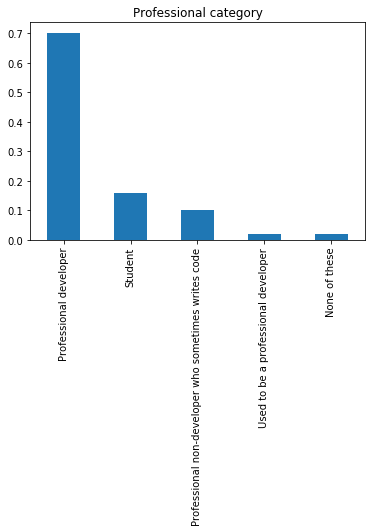

In [209]:
status_vals = df.Professional.value_counts()
print(status_vals)
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Professional category");

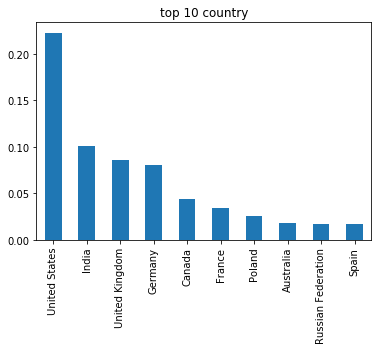

In [213]:
status_vals = df.Country.value_counts()
#print(status_vals)
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("top 10 country");

# Prepare Data

In [148]:
df = df[df['EmploymentStatus'] == 'Employed full-time']
df.shape

(36148, 154)

In [149]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,36148.000000,34546.000000,34210.000000,14306.000000,26587.000000,12444.000000,383.000000
mean,25460.978754,7.354600,6.926805,3.414092,8.462971,57353.913736,32580.700110
std,14881.306854,1.863625,2.161618,7.102313,1.354441,39882.230088,27843.519773
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044046
25%,12608.750000,6.000000,6.000000,0.000000,8.000000,27956.989247,4404.639554
50%,25275.500000,8.000000,7.000000,1.000000,9.000000,51254.032258,31250.000000
75%,38456.500000,9.000000,8.000000,3.000000,10.000000,80500.000000,50000.000000
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,130000.000000


In [151]:
#Check how many columns are missing data
orig = set(df.columns.tolist())
missing = set(df.columns[df.isnull().any()].tolist())

print(missing)
    

no_nulls = orig - missing#Provide a set of columns with 0 missing values.
print(no_nulls)

{'AssessJobCommute', 'ImportantHiringCommunication', 'ExCoderWillNotCode', 'WantWorkFramework', 'InfluenceConsultants', 'ResumePrompted', 'DiversityImportant', 'ExCoderActive', 'HaveWorkedPlatform', 'YearsProgram', 'UnderstandComputers', 'StackOverflowFoundAnswer', 'JobSatisfaction', 'PronounceGIF', 'EducationTypes', 'AssessJobLeaders', 'WebDeveloperType', 'ImportantHiringTitles', 'InfluenceHardware', 'DifficultCommunication', 'StackOverflowDescribes', 'LearningNewTech', 'AssessJobCompensation', 'ClickyKeys', 'StackOverflowHelpful', 'EquipmentSatisfiedMonitors', 'ImportantHiringGettingThingsDone', 'DeveloperType', 'AssessJobProfDevel', 'ImportantHiringAlgorithms', 'StackOverflowDevices', 'CompanyType', 'SelfTaughtTypes', 'InfluenceVizTools', 'AnnoyingUI', 'KinshipDevelopers', 'CompanySize', 'ChallengeMyself', 'OtherPeoplesCode', 'CompetePeers', 'SeriousWork', 'RightWrongWay', 'StackOverflowSatisfaction', 'ExCoderNotForMe', 'ImportantHiringCompanies', 'StackOverflowAdsDistracting', 'Cou

Professional developer                                  30211
Professional non-developer who sometimes writes code     3815
Student                                                  1264
Used to be a professional developer                       580
None of these                                             278
Name: Professional, dtype: int64


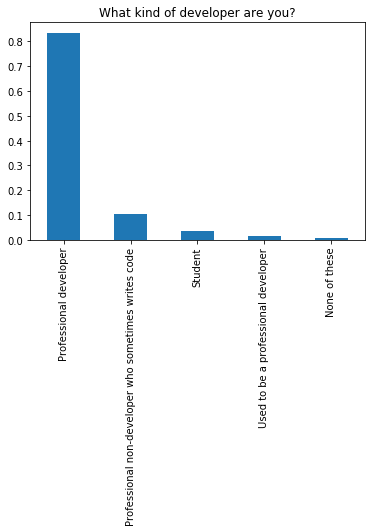

In [150]:
status_vals = df.Professional.value_counts()
print(status_vals)
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

We have to find out what section of respondents have shared their salary detail. Salary is a sensitive info and not many are willing to share in survey. So we have to bear this in mind during our analysis.

In [217]:
df['Salary'].isnull().mean()

0.7491632938978829

In [218]:
#Dataframe which contains folks who have shared their salary.
df_sal = df[df['Salary'].isnull() != True ]

In [219]:
df_sal.shape

(12891, 154)

In [220]:
df_sal['JobSeekingStatus'].value_counts()

I'm not actively looking, but I am open to new opportunities    5788
I am not interested in new job opportunities                    2371
I am actively looking for a job                                  935
Name: JobSeekingStatus, dtype: int64

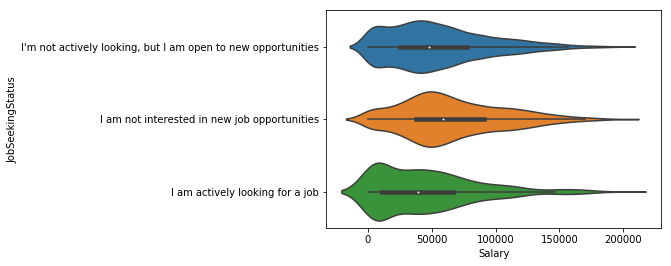

In [221]:
fig, ax = plt.subplots()
sns.violinplot(data=df_sal,  x='Salary', y='JobSeekingStatus', ax=ax)

As we can see salary of people is concentrated on the lower end of specturm for folks who are actively looking out for job. This may hold true because of lot of fresh entrants join at lower wages and are not shy to switch jobs untill they are in the right orbit. 

However there could be other factors as well which can drive people to look out for jobs. But salary definitely plays a part here.

Let's explore  satisfaction as well.

Job satisfaction is something that people can share as is evident below

In [222]:
df['JobSatisfaction'].isnull().mean()

0.21435242839352428

In [223]:
df_job_sat = df[df['JobSatisfaction'].isnull() != True ]

In [224]:
df_job_sat.shape

(40376, 154)

In [225]:
df_job_sat['JobSeekingStatus'].value_counts()

I'm not actively looking, but I am open to new opportunities    17051
I am not interested in new job opportunities                     6903
I am actively looking for a job                                  2885
Name: JobSeekingStatus, dtype: int64

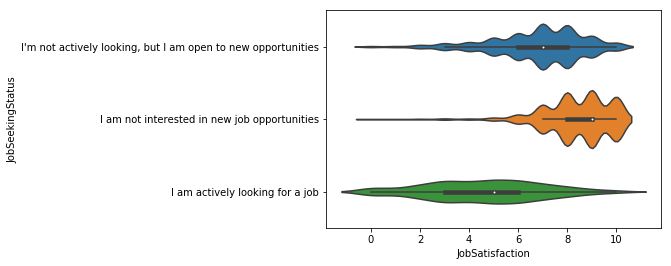

In [226]:
fig, ax = plt.subplots()
sns.violinplot(data=df_sal,  x='JobSatisfaction', y='JobSeekingStatus', ax=ax)

Job satisfaction, is a major force behind people looking for new jobs.

Country
Afghanistan       7.464286
Aland Islands     5.888889
Albania           6.581395
Algeria           4.823529
American Samoa    0.000000
Name: JobSatisfaction, dtype: float64

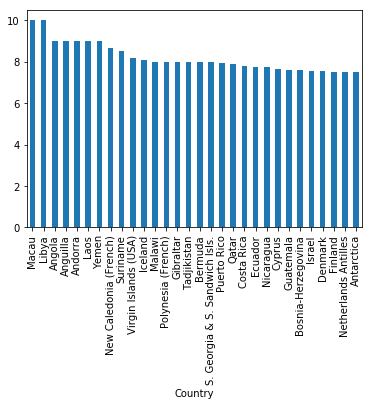

In [227]:
country_mean_jobsat = df_job_sat.groupby('Country')['JobSatisfaction'].mean().sort_index()
display(country_mean_jobsat.head())

df.groupby('Country')['JobSatisfaction'].mean().sort_values( ascending=False)[:30].plot(kind="bar");

Oops!!! not what we have expected right? We have to ensure good sampling size to arrive at a reasonable insight.Lets make sure we have minimum 500 records for job satisfaction.

In [228]:
country_count_jobsat = df_job_sat.groupby('Country')['JobSatisfaction'].count().sort_index()
display(country_count_jobsat.head())

Country
Afghanistan       28
Aland Islands      9
Albania           43
Algeria           17
American Samoa     1
Name: JobSatisfaction, dtype: int64

In [229]:
df_country_job_satisfaction = pd.DataFrame({'mean_job_satisfaction': country_mean_jobsat,'rec_count':country_count_jobsat, 'idx_col':country_mean_jobsat.index})

In [230]:
df_country_job_satisfaction.head()

,mean_job_satisfaction,rec_count,idx_col
Country,,,
Afghanistan,7.464286,28,Afghanistan
Aland Islands,5.888889,9,Aland Islands
Albania,6.581395,43,Albania
Algeria,4.823529,17,Algeria
American Samoa,0.000000,1,American Samoa


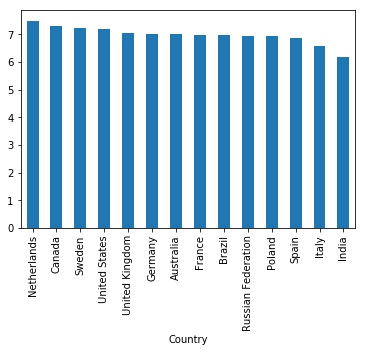

In [231]:
df_country_job_satisfaction[df_country_job_satisfaction['rec_count'] > 500]['mean_job_satisfaction'].sort_values( ascending=False).plot(kind="bar");

Now we are talking! Netherlands did came as a surprise to me, no offence could be my ignorance about the country here. 

# Model Data

Let's use some ML to find out data for our third question. We have to find out the importance of features which lead to candidates applying for a job. For this we will take the JobSeekingStatus  as target and rest of the columns as our feature values. I am going to use RandomForest Classifier as this can handle data with large number of features.Since our featureset here will be much more than number of columns, courtesy high number of catgeorical features, it will be apt for our problem.

In [232]:
#Remove unwanted columns as they are more related to stackoverflow platforms
ignore_columns = ['Respondent', 'JobSeekingStatus']
for x in df.columns:
    if 'StackOverflow' in x or 'Questions' in x :
        ignore_columns.append(x)
        
ignore_columns
    

['Respondent',
 'JobSeekingStatus',
 'StackOverflowDescribes',
 'StackOverflowSatisfaction',
 'StackOverflowDevices',
 'StackOverflowFoundAnswer',
 'StackOverflowCopiedCode',
 'StackOverflowJobListing',
 'StackOverflowCompanyPage',
 'StackOverflowJobSearch',
 'StackOverflowNewQuestion',
 'StackOverflowAnswer',
 'StackOverflowMetaChat',
 'StackOverflowAdsRelevant',
 'StackOverflowAdsDistracting',
 'StackOverflowModeration',
 'StackOverflowCommunity',
 'StackOverflowHelpful',
 'StackOverflowBetter',
 'StackOverflowWhatDo',
 'StackOverflowMakeMoney',
 'QuestionsInteresting',
 'QuestionsConfusing']

In [233]:
def build_features(df):
    '''
    INPUT ARGS:
        df - pandas dataframe 
    
    OUTPUT:
        X - feature values
        y - target value
    
    '''

    df = df.dropna(subset=['JobSeekingStatus'], axis=0)
    
    #Target value
    y = df['JobSeekingStatus']
    ignore_columns = ['Respondent', 'JobSeekingStatus']
    for x in df.columns:
        if 'StackOverflow' in x or 'Questions' in x :
            ignore_columns.append(x)
        
    
    #Drop unwanted columns
    df = df.drop(ignore_columns, axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Log-transform the skewed features
    skewed = ['Salary', 'ExpectedSalary']
    df[skewed] = df[skewed].apply(lambda x: np.log(x + 1))        
                         
                                                                                                                       
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    # Map the target values
    y = y.map({"I'm not actively looking, but I am open to new opportunities": 0,
               "I am not interested in new job opportunities": 0,
               "I am actively looking for a job": 1}) 
    
    X = df
    return X, y

In [234]:
X, y = build_features(df)

In [235]:
print(X)

       CareerSatisfaction  JobSatisfaction  HoursPerWeek     Salary  \
0                7.324651         6.968889      0.000000  10.951488   
3                6.000000         3.000000      5.000000  10.951488   
5                7.324651         6.968889      0.000000  10.951488   
6                7.000000         6.000000      1.000000  10.951488   
7                7.000000         7.000000      1.000000  10.951488   
8                6.000000         6.000000      2.000000  10.951488   
9                6.000000         8.000000      1.000000  10.951488   
10               8.000000         9.000000      3.952282  10.951488   
12               3.000000         6.968889      1.000000  10.951488   
13               8.000000         6.000000      3.000000  10.951488   
15               8.000000         8.000000      0.000000  10.951488   
16               6.000000         6.968889      2.000000  10.951488   
17               9.000000         8.000000      3.952282  11.775297   
21    

In [236]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 23366 samples.
Testing set has 10014 samples.


In [244]:
#Import a supervised learning model 
model = RandomForestClassifier(random_state=42)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Predict using the fitted supervised model
y_test_preds = model.predict(X_test)
y_train_preds = model.predict(X_train)

# Print accuracy and F-score of for training and testing set
print("\nFinal Model trained on full data\n------")
print("Accuracy on training data: {:.4f}".format(accuracy_score(y_train, y_train_preds)))
print("F-score on training data: {:.4f}".format(fbeta_score(y_train, y_train_preds, beta = 0.5)))
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, y_test_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, y_test_preds, beta = 0.5)))

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_


Final Model trained on full data
------
Accuracy on training data: 0.8939
F-score on training data: 0.5838
Accuracy on testing data: 0.8936
F-score on testing data: 0.5835


In [245]:
print(importances)



[0.   0.1  0.28 ... 0.   0.   0.  ]


In [246]:
X_train.columns
feature_cols = X_train.columns

print(feature_cols)

Index(['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'Salary',
       'ExpectedSalary', 'Professional_Professional developer',
       'Professional_Professional non-developer who sometimes writes code',
       'Professional_Student',
       'Professional_Used to be a professional developer',
       'ProgramHobby_Yes, I contribute to open source projects',
       ...
       'Race_White or of European descent; I don’t know; I prefer not to say',
       'Race_White or of European descent; I prefer not to say',
       'SurveyLong_Disagree', 'SurveyLong_Somewhat agree',
       'SurveyLong_Strongly agree', 'SurveyLong_Strongly disagree',
       'InterestedAnswers_Disagree', 'InterestedAnswers_Somewhat agree',
       'InterestedAnswers_Strongly agree',
       'InterestedAnswers_Strongly disagree'],
      dtype='object', length=35555)


35555 35555
[    2     1     4 ... 23706 23707     0]
['HoursPerWeek' 'JobSatisfaction' 'ExpectedSalary'
 'AuditoryEnvironment_Turn on some music' 'YearsProgram_2 to 3 years']
[0.28 0.1  0.04 0.02 0.02]


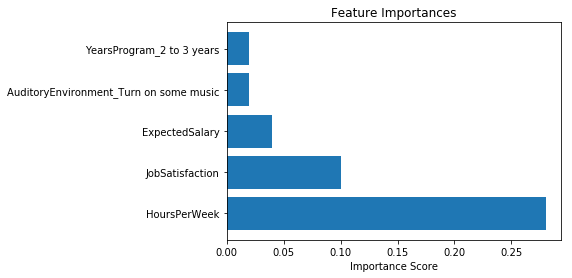

In [247]:

print(len(importances), len(feature_cols))


indices = np.argsort(importances)[::-1]
print(indices)
columns = X_train.columns.values[indices[:5]]
print(columns)
values = importances[indices][:5]
print(values)
y_pos = np.arange(len(columns))

 
plt.barh(y_pos, values, align='center')
plt.yticks(y_pos, columns)
plt.xlabel('Importance Score')
plt.title('Feature Importances');

# Results

## Q1: How does the salary vary among people based on the factor if they are looking out?

Yes we could see that the salary is less where more number of people are looking out for job. 
This may hold true because of lot of fresh entrants join at lower wages and are not shy to switch jobs untill they are in the right orbit.


## Q2: Is there a difference in job satisfaction across the countries?
Yes the job satisfaction varies across the countries. The top listed countries are Netherlands, Canada, Sseden, US, UK 

## Q3: What are the most important factors for employed people which come into consideration while applying for jobs?

The top factors which may drive people for other jobs are:

HoursPerWeek: People who spend more time looking for job will definitely be applying for other jobs.

JobSatisfaction: People who are the most satisfied in their job will be the least interested to look out.

ExpectedSaalry: Higher salry demand is definitely going to drive people for new jobs

AuditoryEnvironment_Turn on some music: This may have to do with workplace environment as people often desire companies with cool workplaces.

YearsProgram_2 to 3 years: This is again showing entry level people who are more keen to switch jobs.




# Conclusion:
In this project we applied CRISP_DM process to mine information which is not obvious from raw dataset. We defined three questions that we were curious about and mined the answers using CRIPS_DM methodology from our dataset.It is amazing to see how data throws the Information out with minor twists. This is a must have skill for all the aspiring Data Scientists!